# Dataset 1!

I chose to begin with a csv of OSHA injury data collected about an industry's construction workers.  I start by looking around at the data and getting a feel for it. 

In [2]:
import pandas as pd

In [3]:
OSHA=pd.read_csv("C:/Users/Izzy/Downloads/OSHA HSE DATA_ALL ABSTRACTS 15-17_FINAL.csv.zip")

Just checking out the column headings since the print of the data is truancated to only 20 columns

In [4]:
OSHA.dtypes

summary_nr               int64
Event Date              object
Abstract Text           object
Event Description       object
Event Keywords          object
con_end                 object
Construction End Use    object
build_stor               int64
Building Stories        object
proj_cost               object
Project Cost            object
proj_type               object
Project Type            object
Degree of Injury        object
nature_of_inj            int64
Nature of Injury        object
part_of_body             int64
Part of Body            object
event_type               int64
Event type              object
evn_factor               int64
Environmental Factor    object
hum_factor               int64
Human Factor            object
task_assigned            int64
Task Assigned           object
hazsub                  object
fat_cause                int64
fall_ht                  int64
dtype: object

My motivating question for this dataset will center on the comparison of injuries sustained by construction workers to the fingers and the head- of these two types of injuries, is one more often sustained while the worker is engaged in a less familiar task?

Considered as a simple way to look at whether or not more serious accidents vs less serious are more likley to occur in unfamiliar setting/task, useful considering implications for tailoring safety protocols.  Assumption is that head injuries generally more serious that finger, but that assumption will also be evaluated at the end. 

Taking a look at the values of interest.  Took a lot of tinkering to display frequencies and percents, and while it's not very pretty, it's useful. 

In [5]:
pd.set_option('display.max_columns', None)
OSHAcrosstab=pd.concat([pd.crosstab(OSHA['Task Assigned'],OSHA['Part of Body'], values=None, rownames=None, colnames=None, aggfunc=None, margins=True, dropna=False),
                        pd.crosstab(OSHA['Task Assigned'],OSHA['Part of Body']).apply(lambda r: r/r.sum(), axis=0)], sort=True)
print(OSHAcrosstab)

                                0    Abdomen     All        Arm       Back  \
Task Assigned                                                                
Not Regularly Assigned   4.000000  39.000000  1799.0  19.000000  29.000000   
Regularly Assigned      11.000000  42.000000  3048.0  53.000000  58.000000   
All                     15.000000  81.000000  4847.0  72.000000  87.000000   
Not Regularly Assigned   0.266667   0.481481     NaN   0.263889   0.333333   
Regularly Assigned       0.733333   0.518519     NaN   0.736111   0.666667   

                           Elbow       Face        Feet  Femur     Fingers  \
Task Assigned                                                                
Not Regularly Assigned  1.000000  30.000000   35.000000   13.0  181.000000   
Regularly Assigned      6.000000  42.000000   89.000000   13.0  369.000000   
All                     7.000000  72.000000  124.000000   26.0  550.000000   
Not Regularly Assigned  0.142857   0.416667    0.282258    0.5 

In [6]:
OSHA.columns[OSHA.isnull().any()]

Index(['Nature of Injury', 'Part of Body', 'Event type',
       'Environmental Factor', 'Human Factor'],
      dtype='object')

Seeing that there were a handful of missing values, went and took a look at the full data to see if they were systematic or random.  The observations containing missing values were few and mostly entirely NA values, appear to be erroneously collected.  They didn't appear to significantly affect the statistics of interest, and seeing as outliers wouldn't affect the catergorical nature of this analysis, I moved ahead to visualization. 

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [8]:
taskdummy=pd.get_dummies(OSHA['Task Assigned'])
print(taskdummy)

bodydummy=pd.get_dummies(OSHA['Part of Body'])
print(bodydummy)


      Not Regularly Assigned  Regularly Assigned
0                          0                   1
1                          0                   1
2                          1                   0
3                          0                   1
4                          0                   1
5                          1                   0
6                          0                   1
7                          0                   1
8                          1                   0
9                          0                   1
10                         1                   0
11                         0                   1
12                         0                   1
13                         0                   1
14                         0                   1
15                         1                   0
16                         1                   0
17                         0                   1
18                         1                   0
19                  

In [9]:
bodydummy2 =bodydummy.drop(columns=['0','Elbow', 'Face', 'Feet', 'Femur', 'Abdomen', 'Arm', 'Back', 'Forearm', 'Hand','Heart', 'Hip', 'Internal Injuries', 'Kidney', 'Knee', 'Left Leg', 'Liver', 'Lower Leg', 'Lungs (Asphyxiation)', 'Lungs (Puncture)', 'Multiple', 'Neck', 'Ribs', 'Right Eye', 'Shoulder', 'Whole Body', 'Wrist'])

In [10]:
OSHA=OSHA.merge(taskdummy, left_index=True, right_index=True)
OSHA=OSHA.merge(bodydummy2, left_index=True, right_index=True)

Now that I have dummy variables created for the categorical variables of interest(just enough, and not more), I'm ready to get visualizing.

In [11]:
fingers = OSHA['Fingers']
head = OSHA['Head']
untask = OSHA['Not Regularly Assigned']



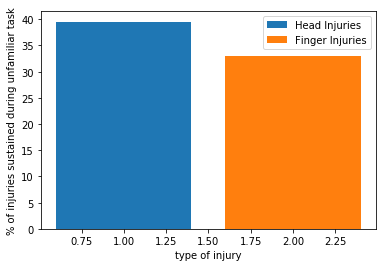

In [186]:
plt.bar(1, 39.5, label='Head Injuries')
plt.bar(2, 32.9, label='Finger Injuries')
plt.xlabel('type of injury')
plt.ylabel('% of injuries sustained during unfamiliar task')
plt.title('')
plt.legend()
plt.show()

I chose to represent the results in a bar chart to make them easily comparable across categories.  I manually input the percentages generated from the cross tabulation above, and as can be seen, the (presumably more dangerous) head injuries occur more frequently than a comparable less serious injury during an unfamiliar task.  While this simple analysis doesn't quite let us see whether it's a statistically significant difference, this finding could imply extra precautions taken for head protection or preliminary training when construction workers are preparing to engage in an unfamiliar task.

# Dataset 2!


This documents my long struggle with JSON.  I tried my darndest, and should have sought TA help, because the hours of tutorials weren't quite enough.  I chose data from redlight camera violations in the city of Chicago.

In [57]:
import json
import csv
with open('C:/Users/Izzy/Downloads/socrata_metadata_red-light-camera-violations.json') as f:
    red=json.load(f)
    print(red)

{'grants': [{'type': 'viewer', 'inherited': False, 'flags': ['public']}], 'rights': ['read'], 'displayType': 'table', 'attributionLink': 'http://www.cityofchicago.org', 'viewType': 'tabular', 'downloadCount': 3919, 'indexUpdatedAt': 1538303900, 'newBackend': False, 'publicationGroup': 1676247, 'tableAuthor': {'profileImageUrlMedium': '/api/users/scy9-9wg4/profile_images/THUMB', 'screenName': 'cocadmin', 'id': 'scy9-9wg4', 'profileImageUrlSmall': '/api/users/scy9-9wg4/profile_images/TINY', 'type': 'interactive', 'displayName': 'cocadmin', 'profileImageUrlLarge': '/api/users/scy9-9wg4/profile_images/LARGE', 'flags': ['mayBeStoriesCoOwner']}, 'publicationStage': 'published', 'description': 'This dataset reflects the daily volume of violations created by the City of Chicago Red Light Program for each camera. The data reflects violations that occurred from July 1, 2014 until present, minus the most recent 14 days. This data may change due to occasional time lags between the capturing of a p

In [22]:
print(json.dumps(red, indent=2))

{
  "grants": [
    {
      "type": "viewer",
      "inherited": false,
      "flags": [
        "public"
      ]
    }
  ],
  "rights": [
    "read"
  ],
  "displayType": "table",
  "attributionLink": "http://www.cityofchicago.org",
  "viewType": "tabular",
  "downloadCount": 3919,
  "indexUpdatedAt": 1538303900,
  "newBackend": false,
  "publicationGroup": 1676247,
  "tableAuthor": {
    "profileImageUrlMedium": "/api/users/scy9-9wg4/profile_images/THUMB",
    "screenName": "cocadmin",
    "id": "scy9-9wg4",
    "profileImageUrlSmall": "/api/users/scy9-9wg4/profile_images/TINY",
    "type": "interactive",
    "displayName": "cocadmin",
    "profileImageUrlLarge": "/api/users/scy9-9wg4/profile_images/LARGE",
    "flags": [
      "mayBeStoriesCoOwner"
    ]
  },
  "publicationStage": "published",
  "description": "This dataset reflects the daily volume of violations created by the City of Chicago Red Light Program for each camera. The data reflects violations that occurred from July 1,

In [23]:
red.keys()

dict_keys(['grants', 'rights', 'displayType', 'attributionLink', 'viewType', 'downloadCount', 'indexUpdatedAt', 'newBackend', 'publicationGroup', 'tableAuthor', 'publicationStage', 'description', 'attribution', 'tableId', 'provenance', 'publicationDate', 'name', 'query', 'hideFromCatalog', 'hideFromDataJson', 'publicationAppendEnabled', 'id', 'columns', 'viewCount', 'rowsUpdatedBy', 'numberOfComments', 'flags', 'metadata', 'rowsUpdatedAt', 'totalTimesRated', 'owner', 'category', 'createdAt', 'oid', 'tags', 'viewLastModified', 'averageRating'])

In [46]:
red['columns']

[{'format': {'align': 'left', 'aggregate': 'count'},
  'cachedContents': {'smallest': '111TH AND HALSTED',
   'null': 0,
   'non_null': 410229,
   'largest': 'WESTERN AND TOUHY',
   'top': [{'item': 'LAKE AND UPPER WACKER', 'count': 20},
    {'item': 'STONEY ISLAND AND 76TH', 'count': 19},
    {'item': 'ROOSEVELT AND KOSTNER', 'count': 18},
    {'item': 'HALSTED AND 95TH', 'count': 17},
    {'item': '87TH AND VINCENNES', 'count': 16},
    {'item': 'JEFFERY AND 95TH', 'count': 15},
    {'item': 'KEDZIE AND 71ST', 'count': 14},
    {'item': 'AUSTIN AND ADDISON', 'count': 13},
    {'item': 'CICERO AND DIVERSEY', 'count': 12},
    {'item': 'KEDZIE AND 31ST', 'count': 11},
    {'item': 'ASHLAND AND IRVING PARK', 'count': 10},
    {'item': 'DAMEN AND 63RD', 'count': 9},
    {'item': 'IRVING PARK AND KILPATRICK', 'count': 8},
    {'item': 'WESTERN AND TOUHY', 'count': 7},
    {'item': 'OGDEN AND KOSTNER', 'count': 6},
    {'item': 'PULASKI AND ARCHER', 'count': 5},
    {'item': 'DAMEN AND ELS

In [25]:
outputFile=open('ConvertedJSONred.csv', 'w')
outputWriter=csv.writer(outputFile)

In [26]:
for item in red['columns']:
    row_array=[]
    for attribute in item:
        row_array.append(item[attribute])
    outputWriter.writerow(row_array)
    
print(row_array)

[10, 'location', 279481516, 'location', ['human_address', 'latitude', 'longitude', 'machine_address', 'needs_recoding'], 'location', {'align': 'left', 'view': 'coords'}, 21489010, 'The coordinates of the camera(s) based on the LATITUDE and LONGITUDE columns. Geocoded using the WGS84.', 296, {'smallest': {'longitude': '-87.72838313514907', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.97562073966174'}, 'null': 24136, 'non_null': 386093, 'largest': {'longitude': '-87.72838313514907', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.97562073966174'}, 'top': [{'item': {'longitude': '-87.66829436339881', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.92519388981048'}, 'count': 20}, {'item': {'longitude': '-87.58623428506996', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.75689717260223'}, 'count': 19}, {'item': {'longitude': '-87.64335804234075', 'human_add

In [53]:

outputFile.close()
import pandas as pd

In [67]:
type(row_array)

list

In [65]:
import matplotlib.pyplot as plt
import basemap as bm

ModuleNotFoundError: No module named 'basemap'

After spending a good hour plus trying to install basemap through conda's command window in order to plot the latitude and longitudes generated above, I became aware that windows currently can't support basemap for anything later than Python 2.7, so that was less cool.  I honestly did have the time or wherewithal to try anything else.  JSON was really, really hard for me to grasp.  I look forward to learning more about it in the future.

# Dataset 3!

For my third dataset I'll be using a SQLite dataset containing most popular baby names from 1880 on.  

In [28]:
import sqlite3


In [92]:
baby2 = sqlite3.connect('C:/Users/Izzy/Downloads/database.sqlite')
c=baby2.cursor()

In [95]:
c.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_table=(c.fetchall())

In [96]:
print(available_table)

[('NationalNames',), ('StateNames',), ('names',)]


In [105]:
headb=pd.read_sql_query('select * from NationalNames limit 10;', baby2)

In [106]:
print(headb)

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414
8   9     Bertha  1880      F   1320
9  10      Sarah  1880      F   1288


After taking a look at the dataset, the tables available and the content of those tables, I decided to examine a few simple questions.  I wanted to look at the most and least popular baby names by absolute numeric value. I was interested to see what they were and when they occured. 

In [115]:
pd.read_sql_query('''select *, max(Count) from NationalNames''', baby2)

,Id,Name,Year,Gender,Count,max(Count)
0,431053,Linda,1947,F,99680,99680


In [124]:
pd.read_sql_query('''select *, Count from NationalNames
                    group by Gender
                    order by Count''', baby2)

,Id,Name,Year,Gender,Count,min(Count)
0,836,Adelle,1880,F,5,5
1,1851,Ab,1880,M,5,5


I wasn't very surprised by either of these.  Recently on a TV show I was watching, the running joke of the episode was how many older women named Linda there are.  Here it is empirically proven that Linda is the single most popular female name there ever has been in a year, and that this massive crop of Linda's is now around 70 years old.  
And though there are a multitude of names that have the minimum(5) count, among these least common names, we see displayed the unique name trend of the 2010's.  With all the extravagantly odd spellings of names cropping up, I doubt this surprises anyone. 

In [122]:
natnames=pd.read_sql_query('''select * from NationalNames''', baby2)

In [123]:
print(natnames)

              Id       Name  Year Gender  Count
0              1       Mary  1880      F   7065
1              2       Anna  1880      F   2604
2              3       Emma  1880      F   2003
3              4  Elizabeth  1880      F   1939
4              5     Minnie  1880      F   1746
5              6   Margaret  1880      F   1578
6              7        Ida  1880      F   1472
7              8      Alice  1880      F   1414
8              9     Bertha  1880      F   1320
9             10      Sarah  1880      F   1288
10            11      Annie  1880      F   1258
11            12      Clara  1880      F   1226
12            13       Ella  1880      F   1156
13            14   Florence  1880      F   1063
14            15       Cora  1880      F   1045
15            16     Martha  1880      F   1040
16            17      Laura  1880      F   1012
17            18     Nellie  1880      F    995
18            19      Grace  1880      F    982
19            20     Carrie  1880      F

In [158]:
Lucy= pd.DataFrame(natnames)
Lucy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 6 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
names     int64
dtypes: int64(4), object(2)
memory usage: 83.6+ MB


In [162]:
Lucy.loc[Lucy['Name']=='Lucy', 'names']=1
Lucy.loc[Lucy['Name']=='Lucy']

,Id,Name,Year,Gender,Count,names
43,44,Lucy,1880,F,590,1
2043,2044,Lucy,1881,F,611,1
3897,3898,Lucy,1881,M,5,1
3980,3981,Lucy,1882,F,673,1
6109,6110,Lucy,1883,F,663,1
8192,8193,Lucy,1884,F,787,1
10494,10495,Lucy,1885,F,711,1
12786,12787,Lucy,1886,F,817,1
15179,15180,Lucy,1887,F,811,1
17552,17553,Lucy,1888,F,964,1


In [163]:
name=natnames['Name']

In [166]:
Lucy[Lucy.names != 3]

,Id,Name,Year,Gender,Count,names
43,44,Lucy,1880,F,590,1
2043,2044,Lucy,1881,F,611,1
3897,3898,Lucy,1881,M,5,1
3980,3981,Lucy,1882,F,673,1
6109,6110,Lucy,1883,F,663,1
8192,8193,Lucy,1884,F,787,1
10494,10495,Lucy,1885,F,711,1
12786,12787,Lucy,1886,F,817,1
15179,15180,Lucy,1887,F,811,1
17552,17553,Lucy,1888,F,964,1


In [176]:
import seaborn as sns

In [179]:
sns.lineplot(x="Year", y="Count", data=Lucy)

AttributeError: module 'seaborn' has no attribute 'lineplot'

After a long struggle to generate a data frame only containing the data for the name Lucy, and then a longer struggle to use seaborn's lineplot function, and the newest version of seaborn proving itself elusive to installation, I reverted to a simple pandas plot to show the variation in the number of babies named Lucy across the last 140 years.  Interesting way to identify patterns, with mid 19th century showing the strongest trend. 

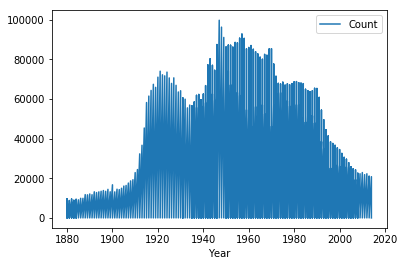

In [180]:
lines=Lucy.plot.line(x='Year', y='Count')

I realize my code is messy, but this was quite the drawn out learning process and after many hours I'm down to the wire with time.  Enjoy what I was able to accomplish!